
# Project:  TMDB Movie Dataset.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

I'm super excied to analyze this data :).

### **Brief Description of each column in the dataset :**
**1.id** : Unique id's for each row.

**2.imdb_id:** System generated unique id.

**3.popularity:** popularity score.

**4.budget:** budget in dollars.

**5.revenue:** revenue in dollars.

**6.original_title:** Movie title.

**7.cast:** cast performed in movie.

**8.homepage:** website link of movie.

**9.director:** director name.

**10.tagline:** tagline of movie.

**11.keywords:** words used to give significant idea.

**12.overview:** general review of movie.

**13.runtime:** movie duration in seconds.

**14.genres:** categories of movie.

**15.production_companies:** company name which manages a movie process from start to finish.

**16.release_date:** movie releasing date.

**17.vote_count:** votes given by viewers.

**18.vote_average:** average votes given by viewers.

**19.release_year:** movie releasing year.

**20.budget_adj:** budget in 2010 dollars,accounting for inflation.

**21.revenue_adj:** revenue in 2010 dollars,accounting for inflation.

## My Questions :

**- How many movies are produced per year?**

**- which is the year with highest popularity of movies?**

**- What are the average runtimes of movies over the years?**

**- Which is the year with highest revenue?**

**-Which production companies have made most of the movies?**

In [63]:
#import all of the packages that I will use
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


<a id='wrangling'></a>
## Data Wrangling




In [64]:
#read the movies csv file
df_mov=pd.read_csv('tmdb-movies.csv')
df_mov.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [65]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Let's discover our data
The info function shows the dataset has 21 columns and 10866 rows.

I will drop some columns that I don't need to make my dataset organize and readable.

There are a missing data on (imdb_id,cast,homepage,director,tagline,keywords,overview,genres and production_companies.).

I noticed the release_date column set as object so i will convert it to datetime.


In [66]:
#covert the release data to datetime
df_mov['release_date'] = pd.to_datetime(df_mov['release_date'])


In [67]:
#Confirm changes
df_mov.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [68]:
#drop the columns that I don't need 
df_mov.drop(['tagline','homepage','keywords','overview','cast','imdb_id'], axis=1, inplace=True)

In [69]:
#Confirm drop the columns
df_mov.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [70]:
#cheack for the null values.
df_mov.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [71]:
# remove the null values
df_mov.dropna(how = 'any',inplace = True)

In [72]:
df_mov.shape

(9807, 15)

In [73]:
#Confirm drop the null values
df_mov.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [74]:
# Check the duplicate
sum(df_mov.duplicated())


1

In [75]:
# removing the duplicate
df_mov.drop_duplicates(inplace = True)

In [76]:
# Check for removing the duplicate
print(df_mov.duplicated().sum())

0


In [77]:
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9806.000000,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000,9.806000e+03,9.806000e+03
mean,63287.653783,0.693143,1.612525e+07,4.407785e+07,102.744340,238.622578,5.966459,2000.890271,1.935070e+07,5.685528e+07
std,90808.473021,1.035525,3.216819e+07,1.224038e+08,28.134561,602.081472,0.914291,13.032372,3.562179e+07,1.512243e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10247.500000,0.231581,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18725.500000,0.418755,1.403930e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.410618e+05,0.000000e+00
75%,70586.750000,0.774232,1.900000e+07,3.064621e+07,112.000000,172.000000,6.600000,2011.000000,2.439107e+07,4.255193e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09



min shows there are a lot of 0 value in budget and revenue I chose to remove them.

In [78]:
# creating a list of revenue and budget column
z_list=['budget', 'revenue']

# replace all the 0 values to NAN in the list
df_mov[z_list] = df_mov[z_list].replace(0, np.NAN)

#Removing all the row which has NaN value in z_list 
df_mov.dropna(subset = z_list, inplace = True)



In [79]:
#Check for change
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3807.000000,3807.000000,3.807000e+03,3.807000e+03,3807.000000,3807.000000,3807.000000,3807.000000,3.807000e+03,3.807000e+03
mean,40031.108484,1.203220,3.758903e+07,1.089161e+08,109.350932,533.886787,6.170239,2001.230890,4.469723e+07,1.386431e+08
std,67569.158096,1.480385,4.231877e+07,1.772686e+08,19.845761,883.605159,0.792423,11.327031,4.488596e+07,2.169636e+08
min,5.000000,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,5940.000000,0.470439,1.000000e+07,1.425795e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.919970e+07
50%,11257.000000,0.809646,2.500000e+07,4.620143e+07,106.000000,208.000000,6.200000,2004.000000,3.038360e+07,6.282247e+07
75%,38577.000000,1.386953,5.000000e+07,1.260554e+08,119.000000,584.000000,6.700000,2010.000000,6.082825e+07,1.656493e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


now we have a clean data that we can explore and draw conclusions about it based on my questions.

<a id='eda'></a>
## Exploratory Data Analysis

let's start to explore and visualize the data : )

## Q1: How many movies are produced per year?

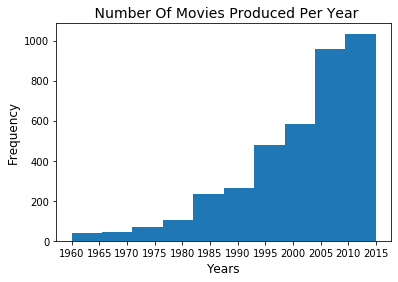

In [80]:
df_movies=df_mov['release_year'].plot(kind='hist',xticks = np.arange(1960,2016,5));
plt.ylabel('Frequency',fontsize = 12)
plt.xlabel('Years',fontsize = 12)
plt.title(' Number Of Movies Produced Per Year',fontsize = 14);

The histogram shows that the highest number of movies produced per year is 2015.

the distribution is skewed to left.

##  Q2: Which is the year with highest popularity of movies?

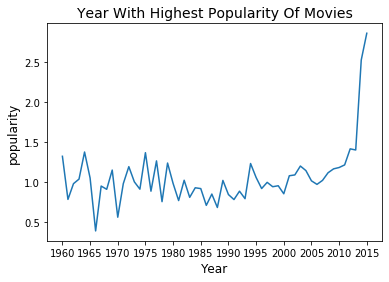

In [81]:
popularity_df=df_mov.groupby('release_year')['popularity'].mean().plot(kind='line',xticks = np.arange(1960,2016,5))
plt.title('Year With Highest Popularity Of Movies', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('popularity', fontsize = 12);

The line plot shows that the year with highest popularity is 2015.

  ## Q3:What are the average runtimes of movies over the years?

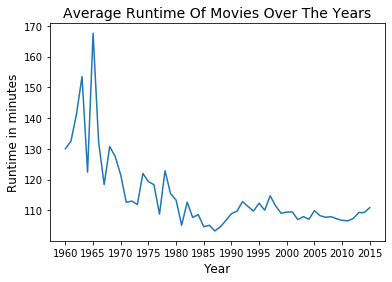

In [82]:
df_mov.groupby('release_year')['runtime'].mean().plot(kind='line',xticks = np.arange(1960,2016,5))
plt.title('Average Runtime Of Movies Over The Years', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Runtime in minutes', fontsize = 12);

The run time decrease over years which is make sense because these days no one has a lot of time to watch a movie with 200 minutes.

## Q4: Which is the year with highest revenue?

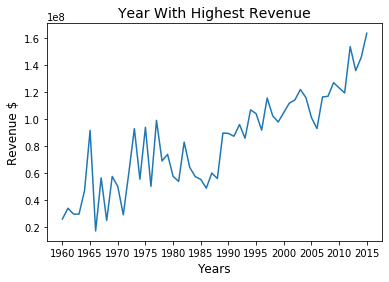

In [83]:
rev_df= df_mov.groupby('release_year')['revenue'].mean().plot.line(x='release_year' ,y='revenue', xticks = np.arange(1960,2016,5));
plt.ylabel('Revenue $',fontsize = 12)
plt.xlabel('Years',fontsize = 12)
plt.title('Year With Highest Revenue',fontsize = 14);

As shown in the graph that year with highest revenue is 2015.

## Q5:Which production companies have made most of the movies?

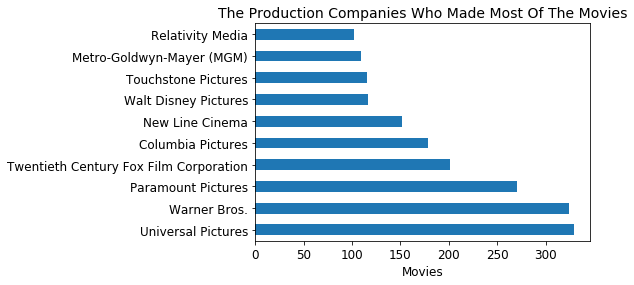

In [84]:
def count_companies(x):
    data_plot = df_mov[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

ten_companies = count_companies('production_companies')
ten_companies.iloc[:10].plot(kind='barh',fontsize=12)
plt.title("The Production Companies Who Made Most Of The Movies",fontsize=14)
plt.xlabel('Movies',fontsize=12);


The bar chart shows that the Universal Pictures has made most of the movies.

<a id='conclusions'></a>
## Conclusions:

finally, my analysis was about five question to conclude my finding:

- The histogram shows that the highest number of movies produced per year is 2015,the distribution is skewed to left.

- The line plot shows that the year with highest popularity is 2015.

- The run time decrease over years which is make sense because these days no one has a lot of time to watch a movie with 200 minutes. 

- As shown in the graph that year with highest revenue is 2015.

- The bar chart shows that the Universal Pictures has made most of the movies.

## Limitations:

The analysis was based on cleaning up the data and thought that missing data affected the results and may be it make the analysis inaccurate.

### Thanks to you for your time.

